BY: **RIYA JOSHI**

EMAIL: riya.joshi@somaiya.edu



---


### **Basic idea behind Logistic regression algorithm**:

*   Logistic regression, contrary to the name, is a classification algorithm.
* It is mainly used for binary classification but with some modification we can use it for multi-class classification too.
* It transforms the output into a probability value (i.e. a number between 0 and 1) using what is known as the logistic sigmoid function. 
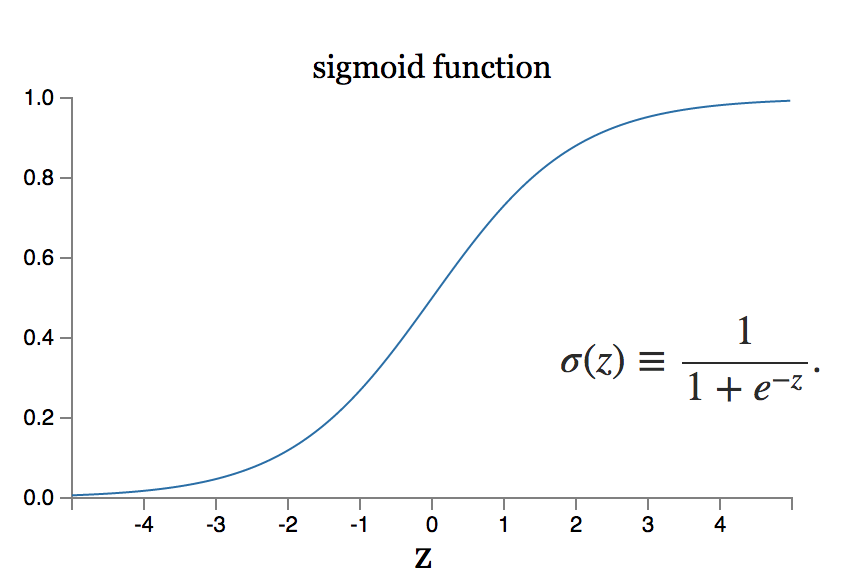
* The function is called the sigmoid function because it is s-shaped. Here is what the sigmoid function looks like in mathematical notation:

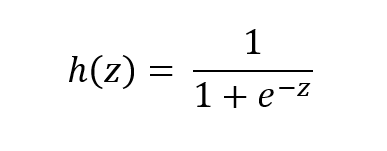

       h(z) is the predicted probability of a given instance (i.e. example) being in the positive class…that is the class represented as 1 in a data set. 

       1- h(z) is the probability of an instance being in the negative class, the class represented as 0 

       z is the input (e.g. a weighted sum of the attributes of a given instance)


* z is commonly expressed as the dot product, w · x, where w is a 1-dimensional vector containing the weights for each attribute, and x is a vector containing the values of each attribute for a specific instance of the data set
* Often the dot product, w · x, is written as matrix multiplication. In that case, z = wTx where T means transpose of the single dimensional weight vector w. The symbol Ɵ is often used in place of w.

So substituting w · x into the sigmoid equation, we get the following equation:


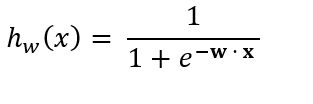

      w is a 1-dimensional vector containing the weights for each attribute.

      The subscript w on hw means the attributes x are weighted by the weight vector w.

      hw(x) is the probability (a value between 0 and 1) that an instance is a member of the positive class.

      x is a vector containing the values of each attribute for a specific instance of the data set.

      w · x = w1x1 + w2x2 + …. + wdxd + b  
      (b: bias)

      d is the number of attributes in the data set

      







### **Applications of Logistic regression**:
* Binary Classification  (mostly)
* In various fields, including machine learning, most medical fields, social sciences and gaming.
*  Conditional random fields, an extension of logistic regression to sequential data, are used in natural language processing.




---




In [205]:
# Importing required libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import style

from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [206]:
df = pd.read_csv('players_20.csv') #importing dataset
df.head() # displaying first five records

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,24-06-1987,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,Medium/Low,Messi,Yes,195800000.0,"#Dribbler, #Distance Shooter, #Crosser, #FK Sp...",RW,10.0,NaN,01-07-2004,2021.0,NaN,NaN,87.0,92.0,92.0,96.0,39.0,66.0,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,05-02-1985,187,83,Portugal,Juventus,93,93,58500000,405000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,96500000.0,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.0,NaN,10-07-2018,2022.0,LS,7.0,90.0,93.0,82.0,89.0,35.0,78.0,"Long Throw-in, Selfish, Argues with Officials,...",84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,05-02-1992,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,"LW, CAM",Right,5,5,5,High/Medium,Neymar,Yes,195200000.0,"#Speedster, #Dribbler, #Playmaker , #Crosser,...",CAM,10.0,NaN,03-08-2017,2022.0,LW,10.0,91.0,85.0,87.0,95.0,32.0,58.0,"Power Free-Kick, Injury Free, Selfish, Early C...",87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,07-01-1993,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,GK,Right,3,3,1,Medium/Medium,Normal,Yes,164700000.0,NaN,GK,13.0,NaN,16-07-2014,2023.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,"Flair, Acrobatic Clearance",13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,07-01-1991,175,74,Belgium,Real Madrid,91,91,90000000,470000,"LW, CF",Right,4,4,4,High/Medium,Normal,Yes,184500000.0,"#Speedster, #Dribbler, #Acrobat",LW,7.0,NaN,01-07-2019,2024.0,LF,10.0,91.0,83.0,86.0,94.0,35.0,66.0,"Beat Offside Trap, Selfish, Finesse Shot, Spee...",81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,22,11,12,6,8,8


In [207]:
# replacing null values with 0
df = df.fillna(value= 0)

In [208]:
# nationality , club , body_type , work_rate , team_position
# target : preferred_foot
new_df=df[['nationality' , 'club' , 'body_type' , 'work_rate' , 'team_position' , 'preferred_foot']]
new_df.head()

,nationality,club,body_type,work_rate,team_position,preferred_foot
0,Argentina,FC Barcelona,Messi,Medium/Low,RW,Left
1,Portugal,Juventus,C. Ronaldo,High/Low,LW,Right
2,Brazil,Paris Saint-Germain,Neymar,High/Medium,CAM,Right
3,Slovenia,Atlético Madrid,Normal,Medium/Medium,GK,Right
4,Belgium,Real Madrid,Normal,High/Medium,LW,Right


In [209]:
# printing datatypes
new_df.dtypes

nationality       object
club              object
body_type         object
work_rate         object
team_position     object
preferred_foot    object
dtype: object

In [210]:
# changing the datatypes of these attributes from object to string as object datatype can't be converted to numeric attributes using LabelEncoder
new_df['nationality']=new_df['nationality'].astype(dtype='string',copy=True)
new_df['club']=new_df['club'].astype(dtype='string',copy=True)
new_df['body_type']=new_df['body_type'].astype(dtype='string',copy=True)
new_df['work_rate']=new_df['work_rate'].astype(dtype='string',copy=True)
new_df['team_position']=new_df['team_position'].astype(dtype='string',copy=True)
new_df['preferred_foot']=new_df['preferred_foot'].astype(dtype='string',copy=True)

In [211]:
# printing changed datatypes
new_df.dtypes

nationality       string
club              string
body_type         string
work_rate         string
team_position     string
preferred_foot    string
dtype: object

In [212]:
# converting catagorical attributes to numeric attributes using Label encoder
for i in new_df.columns:
  new_df[i] = LabelEncoder().fit_transform(new_df[i])
new_df.head()

,nationality,club,body_type,work_rate,team_position,preferred_foot
0,5,224,4,7,26,0
1,121,350,1,1,15,1
2,18,462,5,2,1,1
3,133,63,6,8,6,1
4,12,505,6,2,15,1


In [213]:
# splitting dataset into 70:30 ratio

# Defining train size
train_size = int(0.7 * len(new_df))

# Splitting dataset
train_set = new_df[:train_size]
test_set = new_df[train_size:]

In [214]:
# separating train_set into X and Y
X=train_set.drop('preferred_foot', axis=1)
y=train_set['preferred_foot']

# separating test_set into X and Y
X_test=test_set.drop('preferred_foot', axis=1)
y_test=test_set['preferred_foot']

In [215]:
X.head()

,nationality,club,body_type,work_rate,team_position
0,5,224,4,7,26
1,121,350,1,1,15
2,18,462,5,2,1
3,133,63,6,8,6
4,12,505,6,2,15


### Pre-processing

( this is really an inportant step , because if the values of different attributes vary in ranges by much different it can affect the model heavily resulting in NaN loss ;/ )

In [216]:
# Using StandardScaler function of sklearn.preprocessing we are standardizing 
# and transforming the data in such a way that the mean of the transformed data is 0 and the Variance is 1.
sc_x = StandardScaler()
X = sc_x.fit_transform(X)
X_test = sc_x.fit_transform(X_test)
X[0:2]

array([[-1.44865589, -0.62322224, -0.7110833 ,  0.51821518,  0.58377733],
       [ 0.96986745,  0.00748178, -2.47304581, -1.51929096, -0.62068117]])

In [217]:
y.head()

0    0
1    1
2    1
3    1
4    1
Name: preferred_foot, dtype: int64

##**LOGISTIC REGRESSION**

Formulae's

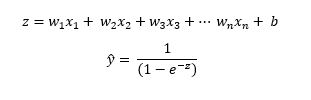

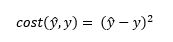

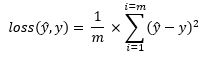

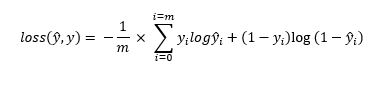

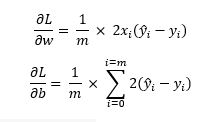

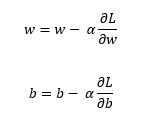



In [218]:
# sigmoid function
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [219]:
# predicting y
def y_predicted(X,weights,bias):
  z=np.dot(X,weights)+bias
  y=sigmoid(z)

In [220]:
# calculating binary cross entropy loss
def binary_cross_entropy(y,y_predicted):
  m=len(y)
  return -(1/m)*np.sum(y*np.log(y_predicted)+(1-y)*np.log(1-y_predicted))

In [221]:
def Logistic_Regression(X, y, learning_rate, number_of_iterations):

  global losses,weights,bias 
  losses = []

  m = X.shape[0] # no: of training examples
  n = X.shape[1] # no: of independent/feature variables

  # initializing weights and bias
  weights=np.zeros(n)
  bias=0

  for i in range(0,number_of_iterations):

    # calculate y_predicted using the line equation and sigmoid function
    z = np.dot(X,weights)+bias
    y_predicted = sigmoid(z) + np.finfo(float).eps # adding epsilon to avoid 0 in the log function

    # calculate the loss
    loss = binary_cross_entropy(y,y_predicted)
    losses.append(loss)

    # calculate partial derivative

    dw = (1/m)*(2*np.matmul(X.T,(y_predicted-y)))
    db = (1/m)*(np.sum(y_predicted-y))

    # update weights and bias
    weights -= learning_rate*dw
    bias -= learning_rate*db

    if i%100==0:
      print("Loss after iteration ",i," iteration is: ",loss)

In [222]:
# predicting probabilities for the training set
def predict_probabilities(X):
  z = np.dot(X,weights)+bias
  return sigmoid(z)

In [231]:
# predicting the final outcome based on the threshold and prediction probabilities

def predict_class(X,thetha = 0.5):
  # thetha represents the threshold

  probabilities = predict_probabilities(X)
  predictions = [1 if i>thetha else 0 for i in probabilities]

  # print(set(probabilities))
  return predictions

In [232]:
Logistic_Regression(X, y, 0.01, 1000)

Loss after iteration  0  iteration is:  0.693147180559945
Loss after iteration  100  iteration is:  0.640836361940794
Loss after iteration  200  iteration is:  0.6092673438282016
Loss after iteration  300  iteration is:  0.5898481907225694
Loss after iteration  400  iteration is:  0.5776750533374495
Loss after iteration  500  iteration is:  0.5699149166579361
Loss after iteration  600  iteration is:  0.5648962610271326
Loss after iteration  700  iteration is:  0.5616109036168895
Loss after iteration  800  iteration is:  0.5594381873792835
Loss after iteration  900  iteration is:  0.5579890070804306


In [233]:
print("weights: ",weights)
print("bias: ",bias)

weights:  [0.02300137 0.00638824 0.07130289 0.06149242 0.15420906]
bias:  0.9774585540548958


In [234]:
final_classification = predict_class(X,thetha = 0.5)
predict_class(X,thetha = 0.5)

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


### Visualizing training loss

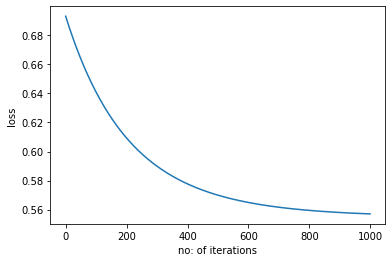

In [235]:
plt.plot(range(0,len(losses)), losses)
plt.xlabel("no: of iterations")
plt.ylabel("loss")
plt.show()

### Evaluation of model

In [236]:
Logistic_Regression(X_test, y_test, 0.01, 1000)

Loss after iteration  0  iteration is:  0.693147180559945
Loss after iteration  100  iteration is:  0.6261143969027227
Loss after iteration  200  iteration is:  0.585473489474409
Loss after iteration  300  iteration is:  0.5602937009110805
Loss after iteration  400  iteration is:  0.5443457099370156
Loss after iteration  500  iteration is:  0.5340412133158399
Loss after iteration  600  iteration is:  0.527266757181275
Loss after iteration  700  iteration is:  0.5227467439654019
Loss after iteration  800  iteration is:  0.5196930155582492
Loss after iteration  900  iteration is:  0.5176080914738925


In [237]:
y_pred = predict_class(X_test,thetha = 0.5)
accuracy_score(y_test,y_pred)

0.7882932166301969

In [238]:
confusion_matrix(y_test,y_pred)

array([[   0, 1161],
       [   0, 4323]])

### Comparing our model with Scikit-learn model

In [239]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X,y)
preds=model.predict(X_test)

In [240]:
accuracy_score(y_test,preds)

0.7882932166301969

In [241]:
confusion_matrix(y_test,preds)

array([[   0, 1161],
       [   0, 4323]])

:)